# DESCRIÇÃO TEORICO PRÁTICA DE 3 TÉCNICAS DE TRANSFORMAÇÃO E NORMALIZAÇÃO

## Por Luiz Paulo de Lima Araújo

*ad omnes nuntiatur*

### TRANSFORMAÇÕES

#### BINNING (Discretização)

##### O que é ?
É a redução da complexidade dos dados contínuos de difícil análise para dados discretos.

##### O que faz ?
Consiste, em sua versão de largura igual, na segmentação de uma grandeza em partes com quantidades iguais de elementos. De 10 em 10, de 20 em 20.

##### Onde geralmente é aplicado ?
E aplicado como um meio de abstração para compreensão de dados pois dimiui o efeito de valores fora do padrão (outliers).

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('./dados/VegaIBalloonData.csv')
df.describe()

,pressure_mb,verticalWind_ms,AmbientTemperature_K
count,2040.000000,2040.000000,2040.000000
mean,580.158971,-0.355029,314.402407
std,35.650755,0.809637,4.295059
min,529.060000,-3.760000,308.620000
25%,557.990000,-0.740000,311.570000
50%,569.550000,-0.320000,312.920000
75%,591.950000,0.330000,316.072500
max,881.850000,1.270000,343.600000


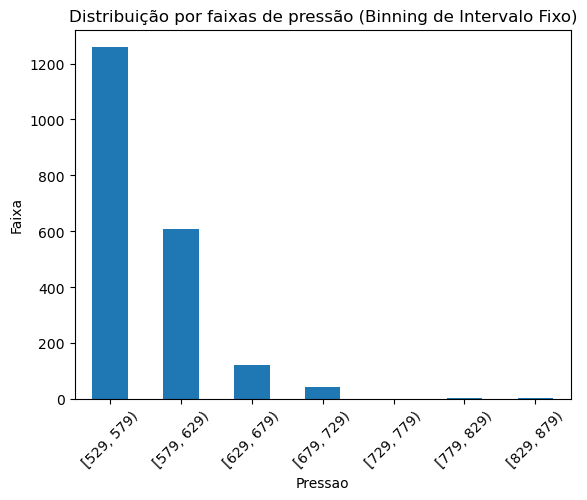

In [2]:
import matplotlib.pyplot as plt

# efetuando discretização da pressão medida pelo balão de 10 em 10 unidades
min = int(df['pressure_mb'].min() // 1)
max = int(df['pressure_mb'].max() // 1)
discretizacao = pd.cut(df['pressure_mb'], bins=range(min,max,50), right=False)
c = discretizacao.value_counts().sort_index()
c.plot(kind='bar')
plt.xlabel("Pressao")
plt.ylabel("Faixa")
plt.title("Distribuição por faixas de pressão (Binning de Intervalo Fixo)")
plt.xticks(rotation=45)
plt.show()


#### TRANFORMAÇÃO POR RAIZ QUADRADA

##### O que é ?
É transformação matemática simples e não paramétrica que pode ser facilmente aplicada em modelos preditivos. É monotomica por não afetar a ordem dos dados.
##### O que faz ?
Para cada elemento x do conjunto de dados obtém-se a imagem y no contra dominio aplicando a seguinte equação:<br>
![Demonstração](./imagens/raizQuadrada.svg)<br>
O resultado é a redução da assimetria de distribuições
##### Onde geralmente é aplicado ?
Aplica-se em situações onde elementos mais altos têm impacto maior em treinamento de modelos de inteligência artificial. Requer a inexistência de elementos negativos pois raiz de número negativo pertence ao conjunto dos complexos.

In [3]:
#Transformação por raiz quadrada.
df = pd.read_csv('./dados/VegaIBalloonData.csv')

<Axes: xlabel='AmbientTemperature_K', ylabel='Count'>

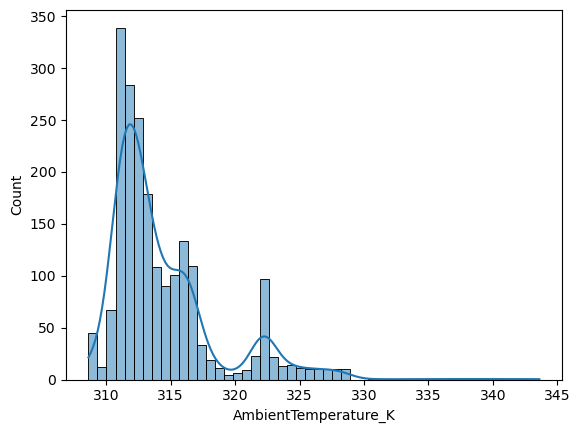

In [4]:
sns.histplot(x='AmbientTemperature_K', data=df, kde=True)

<Axes: >

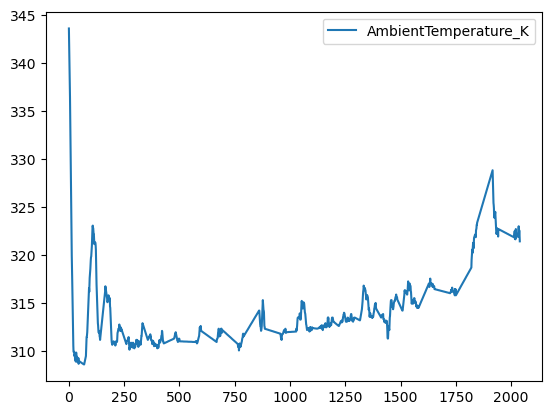

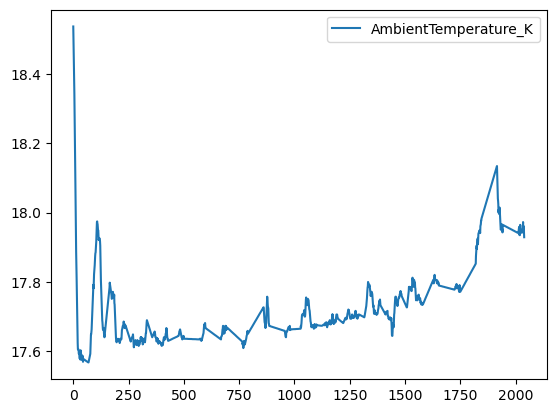

In [5]:
from math import sqrt
#antes da transformação
df.plot(y="AmbientTemperature_K")

#Definido a função de transformação por raiz
def trq(x):
    if x > 0:
        return sqrt(x)
    return x

#Aplicando!
df['AmbientTemperature_K'] = df['AmbientTemperature_K'].apply(trq)

#Visualizando resultados.
df.plot(y="AmbientTemperature_K")

<Axes: xlabel='AmbientTemperature_K', ylabel='Count'>

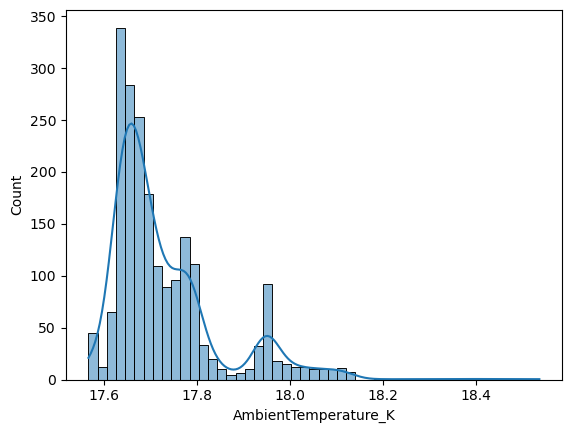

In [6]:
# Histograma depois da transformação
sns.histplot(x='AmbientTemperature_K', data=df, kde=True)

#### Z SCORE

##### O que é ?
faz com que os dados tenham média 0 e desvio padrão 1.

##### O que faz ?
![Demonstração](./imagens/zscore.svg)<br>
Onde Mu é a média e Sigma o desvio padrão

##### Onde geralmente é aplicado ?
Para comparar dados de diferentes escalas e unidades. Também amplamente usado para detectar outliers.

<Axes: >

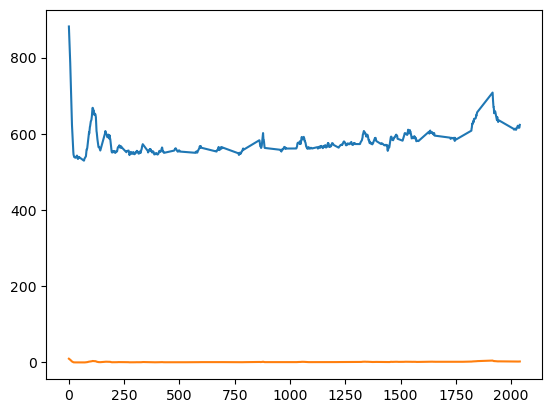

In [7]:
from scipy.stats import zscore
import seaborn as sns
df = pd.read_csv('./dados/VegaIBalloonData.csv')
df['pressure_mb'].plot()
df['pressure_mb'] = zscore(df['pressure_mb'], axis=0)
df['pressure_mb'].plot()

### NORMALIZAÇÕES

#### ROBUST SCALING

##### O que é ?
Técnica de normalização que considera mediana e a aplitude interquartil. Sua propriedade consiste em ser resistente a grandes pontos fora da curva (outliers)
##### O que faz ?<br>
Amplitude interquartil<br>
![Demonstração](./imagens/IQR.svg)<br>
Mediana como a letra grega Mu:<br>
![none](./imagens/interquartileAmplitude.svg)<br>
##### Onde geralmente é aplicado ?
Não é afetado por valores extremos: útil em dados com grandes outliers.

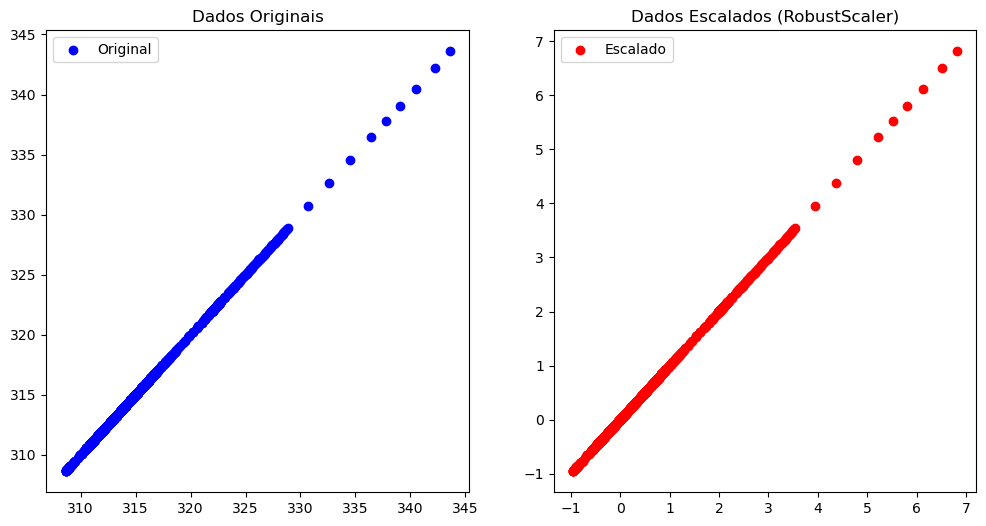

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('./dados/VegaIBalloonData.csv')

scaler = RobustScaler()

# Aplicando o RobustScaler do sklearn
dados_escalados = scaler.fit_transform(df)
df_escalado = pd.DataFrame(dados_escalados, columns=df.columns)

# Plotando os dados originais e escalados para comparação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Dados originais
ax1.scatter(df['AmbientTemperature_K'], df['AmbientTemperature_K'], color='blue', label='Original')
ax1.set_title('Dados Originais')
ax1.legend()

# Dados escalados com RobustScaler
ax2.scatter(df_escalado['AmbientTemperature_K'], df_escalado['AmbientTemperature_K'], color='red', label='Escalado')
ax2.set_title('Dados Escalados (RobustScaler)')
ax2.legend()

plt.show()

#### NORMALIZAÇÃO L1 (Regularização)
##### O que é ?
também conhecido como Least Absolute Deviations (LAD) ou Manhattan Norm, é uma técnica usada para normalizar dados. Ela envolve transformar os dados de forma que a soma dos valores absolutos do vetor (como uma coluna em um conjunto de dados) seja igual a 1.

##### O que faz ?
Faz-se um somatório dos valores absolutos da série.<br>
![Demonstração](./imagens/L1.svg)

##### Onde geralmente é aplicado ?
Permite lidar com dados esparsos (com muitos zeros) preservando a escassez dos dados. Devido à natureza de tomar valores absolutos, a N1 é menos sensível à outliers.

<Axes: >

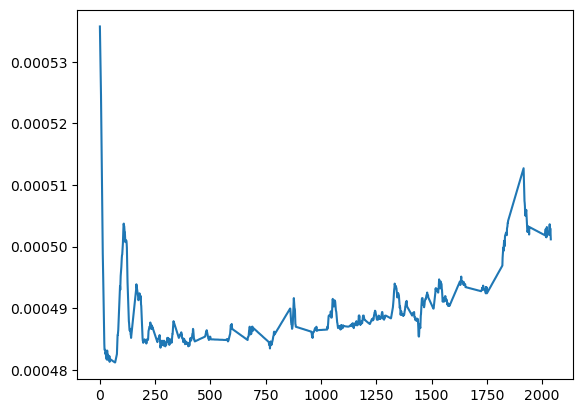

In [9]:
import numpy as np
def l1_normalization(serie):
    return serie / np.sum(np.abs(serie))
df = pd.read_csv('./dados/VegaIBalloonData.csv')
df["AmbientTemperature_K"] = l1_normalization(df['AmbientTemperature_K'])
df["AmbientTemperature_K"].plot()

#### NORMALIZAÇÃO L2

##### O que é ?
Este método dimensiona os componentes de um vetor de características de modo que o vetor tenha um comprimento (ou norma) de 1.

##### O que faz ?
Faz-se x sobre somatório de x absoluto <br>
![Demonstração](./imagens/L2.svg)

##### Onde geralmente é aplicado ?
A normalização L2 nem sempre é apropriada, especialmente se a magnitude do vetor for significativa no contexto da análise. No entanto, em casos em que a direcionalidade é mais importante do que a magnitude, ou quando você precisa padronizar as escalas de vários recursos, a normalização L2 é uma ferramenta poderosa.

<Axes: >

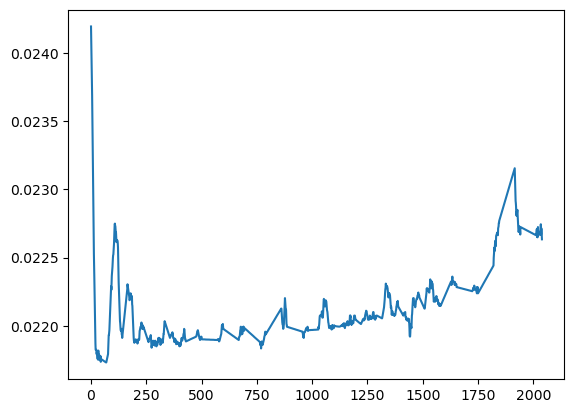

In [10]:
def l2_normalization(series):
    return series / np.sqrt(np.sum(np.square(series)))
df = pd.read_csv('./dados/VegaIBalloonData.csv')
df["AmbientTemperature_K"] = l2_normalization(df['AmbientTemperature_K'])
df["AmbientTemperature_K"].plot()